In [36]:
import pandas as pd

import src.analysis as analysis
from src.fetch_data.table_builders import SeatgeekData
import matplotlib.pyplot as plt
import env
from src.scalpyr import ScalpyrPro
from sqlalchemy import create_engine

In [37]:
engine = create_engine(env.PLANETSCALE_URL)
client = ScalpyrPro(env.SEATGEEK_CLIENT_ID)

# sql query get stat where event_id in (select event_id in performer_event_venue where datetime_utc is greater than or equal current day)
stats_query = (
    'select * from stat '
    'where event_id in (select event_id from performer_event_venue where performer_event_venue.datetime_utc >= \'2023-08-14\') and '
    'stat.utc_read_time >= \'2023-08-01\' '
    'order by utc_read_time asc '
    'limit 10000'
)
data_db = analysis.DataPlotter.from_db(
    engine, client,
    stats_query=stats_query,
)

getting events from database 2023-08-23 14:48:40.051974
building seatgeek data 2023-08-23 14:48:49.825399


In [38]:
# Terminal 5 id 814, 538
client.get_performers({'type': 'band', 'slug': 'lady-gaga', 'has_upcoming_events': 'true', 'per_page': 100})

,type,name,id,has_upcoming_events,primary,url,score,slug,num_upcoming_events
0,band,Lady Gaga,1083,True,True,https://seatgeek.com/lady-gaga-tickets,0.69,lady-gaga,12


,utc_read_time,average_price,title
event_id,,,
5870656,2023-08-08 12:00:00,620.0,"lainey-wilson,grand-event-center-golden-nugget..."
5912739,2023-08-15 00:00:00,279.0,"lainey-wilson,the-wharf-amphitheater,2023-08-1..."
5912741,2023-08-12 12:00:00,279.0,"lainey-wilson,the-wharf-amphitheater,2023-08-2..."
5919105,2023-08-10 12:00:00,265.0,"lainey-wilson,the-wharf-amphitheater,2023-08-1..."
5962279,2023-08-14 00:00:00,436.0,"lainey-wilson,knoxville-civic-auditorium,2023-..."
5962283,2023-08-10 00:00:00,351.0,"lainey-wilson,appalachian-wireless-arena,2023-..."
5962285,2023-08-14 00:00:00,456.0,"lainey-wilson,huntington-center,2023-09-15T23:..."
5962288,2023-08-13 00:00:00,422.0,"lainey-wilson,covelli-centre,2023-09-16T23:30:00"
5962291,2023-08-10 12:00:00,379.0,"lainey-wilson,ccnb-amphitheatre-at-heritage-pa..."


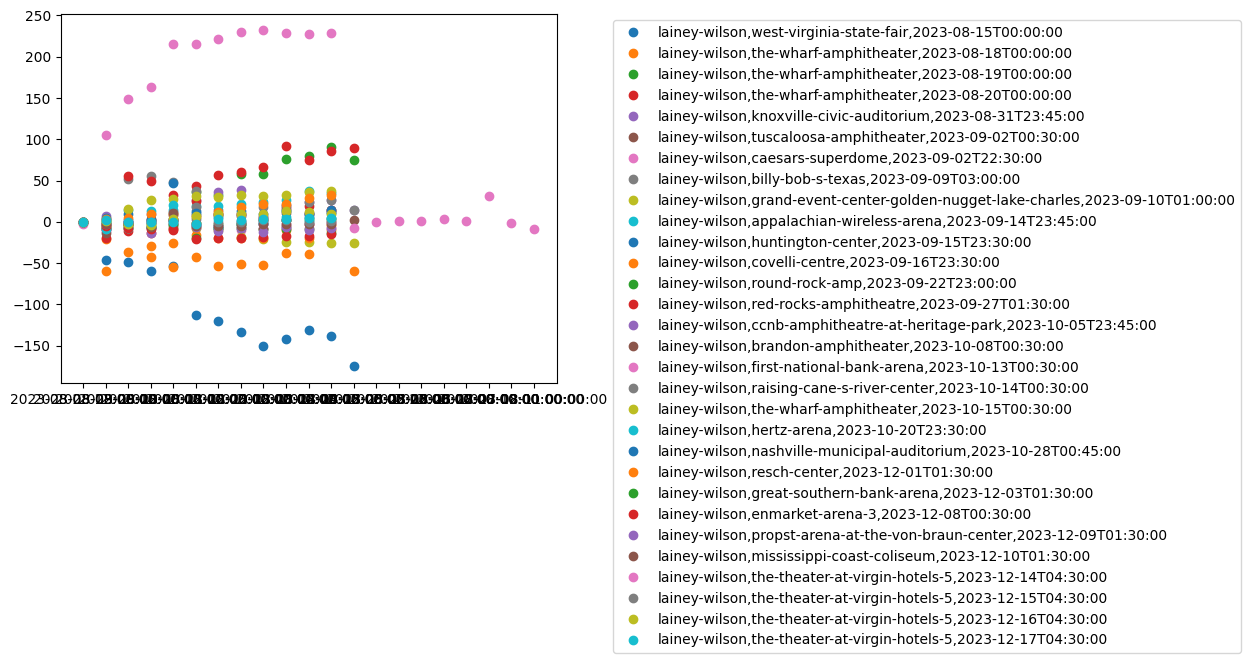

In [40]:

def plot_calc(groups, calc_col_name, calc_function, include, exclude):
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        # sort by utc_read_time
        group = group.sort_values(by='utc_read_time')
        # rebase average price to 100
        base_point_values = group.average_price.iloc[0]
        group[calc_col_name] = calc_function(group)
        if (include and name in include) or name not in exclude:
            ax.plot(group.utc_read_time.astype(str), group[calc_col_name], marker='o', linestyle='', label=name)
    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

def normalize_price(group):
    # rebase average price to 100
    base_point_values = group.average_price.iloc[0]
    return group.average_price - base_point_values

stats_view = data_db.stats_info_view('lainey-wilson')
# calculate mean of average price
# sort by datetime_utc
stats_view = stats_view.sort_values(by='datetime_utc')
_groups = stats_view.groupby('title', sort=False)

plot_calc(_groups, 'average_price_normalized', normalize_price, [], [])

# select latest row for each event_id by most recent utc_read_time, include title
view = stats_view.groupby('event_id').agg({'utc_read_time': 'last', 'average_price': 'last', 'title': 'last'})
view

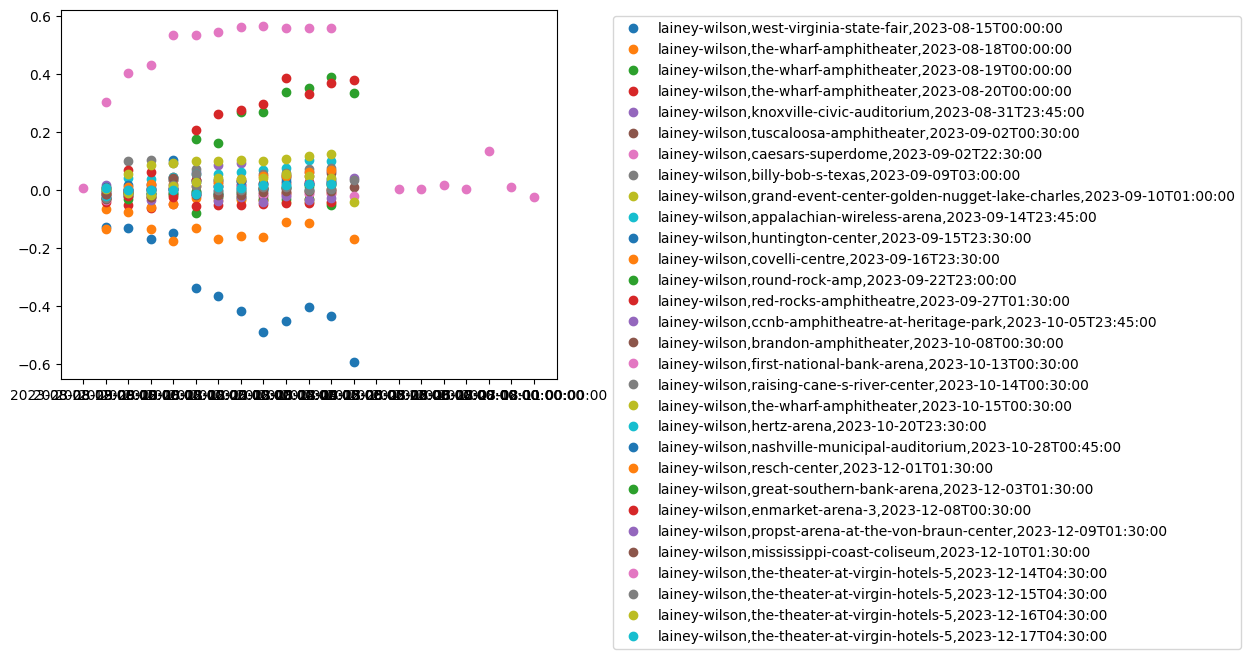

In [42]:
# plot the expanding sum of the percent change in average price
plot_calc(_groups, 'average_price_pct', lambda x: x.average_price.pct_change().cumsum(), [], [])

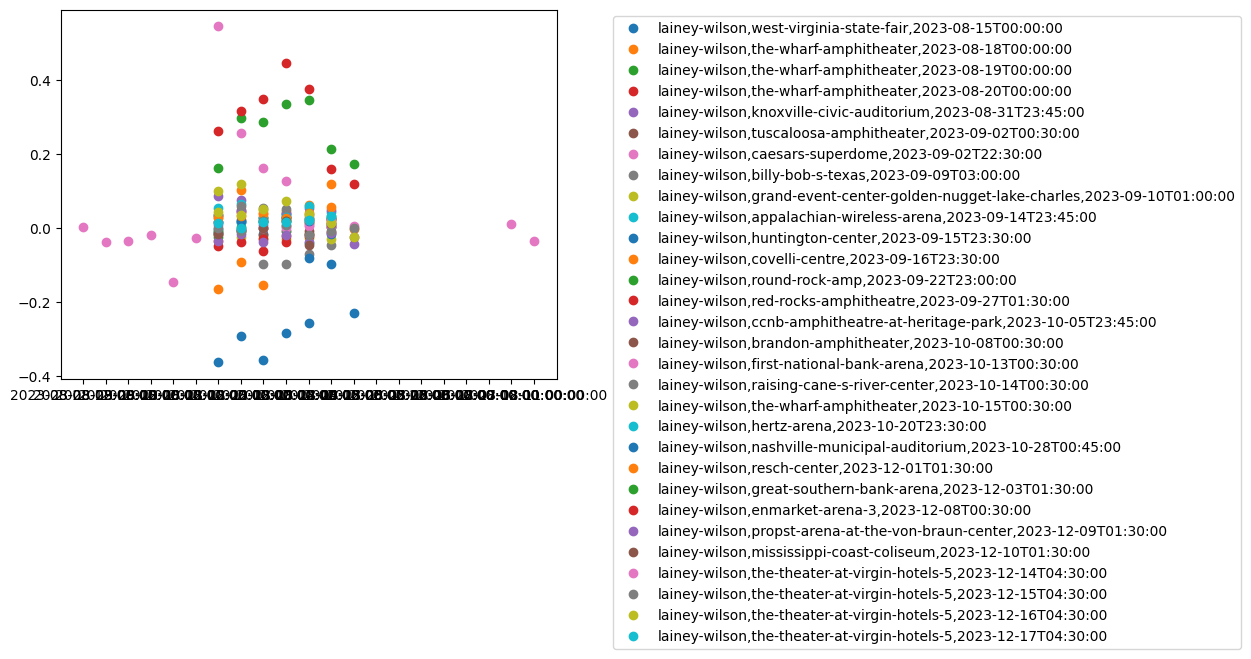

In [43]:
# plot the 6 day rolling percent change in average price
plot_calc(_groups, 'average_price_pct', lambda x: x.average_price.pct_change().rolling(6).sum(), [], [])

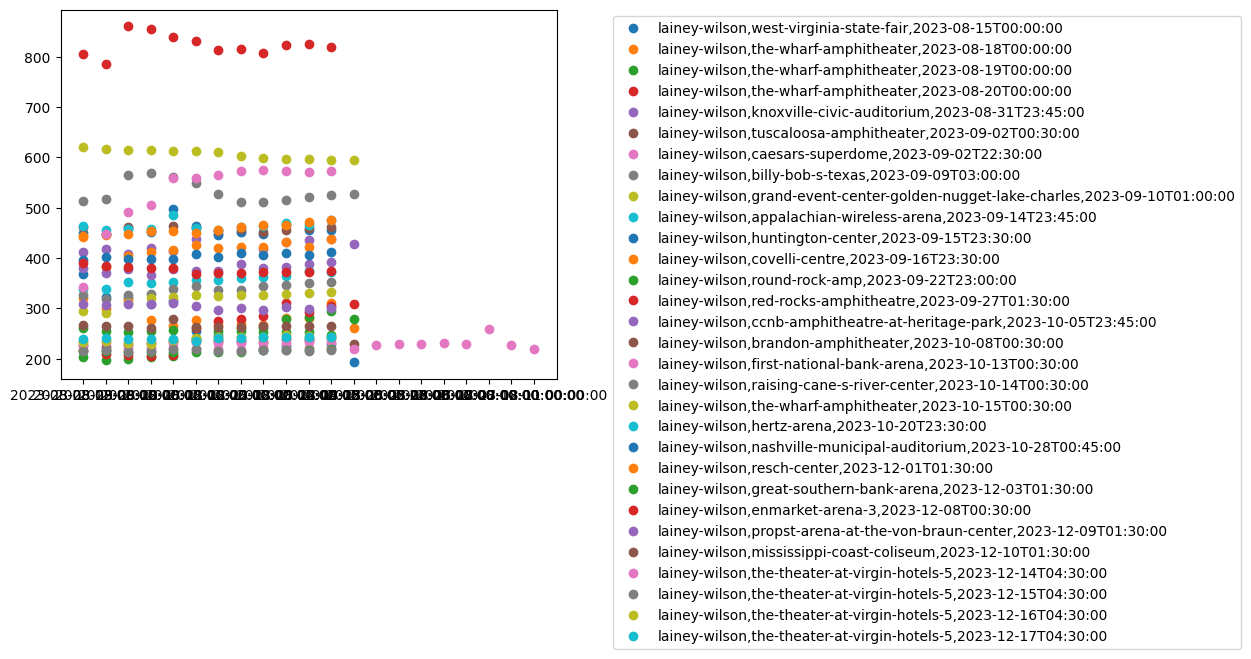

In [44]:
# plot average price
plot_calc(_groups, 'average_price', lambda x: x.average_price, [], [])

<Axes: xlabel='utc_read_time', ylabel='average_price'>

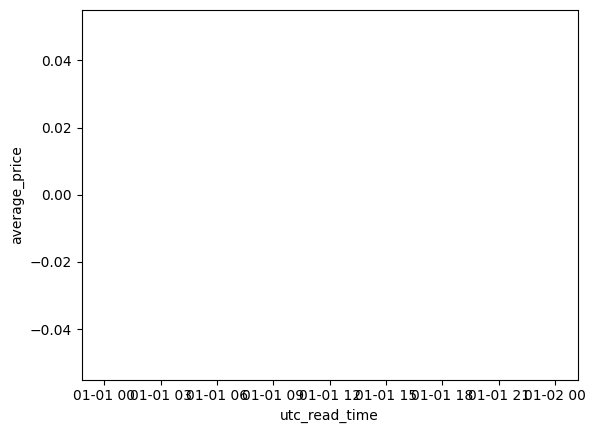

In [45]:
stats_view.loc[stats_view.title == 'eagles,prudential-center,2023-09-17T23:30:00'].plot(x='utc_read_time', y='average_price', kind='scatter')

In [46]:
import numpy as np


# from stats table, for each unique event id in stats get percent change in price from 1 week ago
def get_pct_change(_stats_view: pd.DataFrame, _event_id, from_date=None):
    event_stats = _stats_view[_stats_view.event_id == _event_id]
    # get percent change in price from_date to now
    event_stats = event_stats.loc[event_stats.utc_read_time >= from_date]
    # calculate percent change of average price
    event_stats['avg_price_pct'] = event_stats.average_price.pct_change()
    event_stats['avg_price_log'] = np.log(event_stats.average_price)- np.log(event_stats.average_price.shift(1))
    event_stats['avg_price_log_cumsum'] = event_stats.avg_price_log.cumsum()
    event_stats['move_avg_pct_change'] = event_stats.average_price.pct_change().rolling(6).sum()
    return event_stats

stats_pct_change_views = []
for event_id in data_db.stat.event_id.unique():
    res = get_pct_change(data_db.stat, event_id, from_date='2021-08-02')
    stats_pct_change_views.append(res)

stats_pct_change_df = pd.concat(stats_pct_change_views)
# select last row for each event_id by most recent utc_read_time
scoreboard = stats_pct_change_df.groupby('event_id').agg({'avg_price_log_cumsum': 'last'}).reset_index().rename(columns={'index': 'event_id'})
scoreboard['event_id'] = scoreboard.event_id.astype(np.int64)

In [47]:
# get top 20 events by avg_price_log_cumsum
top = scoreboard.sort_values(by='avg_price_log_cumsum', ascending=False).head(20)
# get bottom 20 events by avg_price_log_cumsum
bottom = scoreboard.sort_values(by='avg_price_log_cumsum', ascending=True).head(20)

In [48]:
top

,event_id,avg_price_log_cumsum
107,5920631,1.277561
433,6035816,0.511409
19,5870156,0.454867
410,6019146,0.424130
459,6052769,0.353734
102,5912741,0.345605
496,6057987,0.344577
336,6008864,0.313973
101,5912739,0.313092
1,5747589,0.249668


In [49]:
bottom

,event_id,avg_price_log_cumsum
499,6058413,-1.289131
449,6052566,-0.928870
258,5981240,-0.854092
171,5947840,-0.813637
438,6039657,-0.745107
214,5962478,-0.700827
215,5963084,-0.645393
551,6109442,-0.626898
548,6109436,-0.620433
547,6109434,-0.587710


In [52]:
# get event info for top 20 events
top_events = client.get_by_id(req_type='events', ids=top.event_id)
bottom_events = client.get_by_id(req_type='events', ids=bottom.event_id)
# merge event info with scoreboard
top_events = pd.merge(top_events, top, left_on='id', right_on='event_id')
# set venue to venue name
top_events['venue'] = top_events.venue.apply(lambda x: x['name'])
bottom_events = pd.merge(bottom_events, bottom, left_on='id', right_on='event_id')
# set venue to venue name
bottom_events['venue'] = bottom_events.venue.apply(lambda x: x['name'])
top_events

,type,id,datetime_utc,venue,performers,short_title,stats,url,score,announce_date,status,access_method,visible_at,event_id,avg_price_log_cumsum
0,concert,5830103,2023-08-27T01:00:00,Lumen Field,"[{'type': 'band', 'name': 'Ed Sheeran', 'image...",Ed Sheeran with Khalid,"{'listing_count': 693, 'average_price': 164, '...",https://seatgeek.com/ed-sheeran-with-khalid-ti...,0.783,2022-10-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-08-12...",2023-04-18T00:47:59Z,5830103,0.240249
1,concert,6053203,2023-09-16T00:00:00,Madison Square Garden,"[{'type': 'band', 'name': 'Hip Hop 50', 'image...","Hip Hop 50 Live with Wu-Tang Clan, Mary J. Bli...","{'listing_count': 579, 'average_price': 577, '...",https://seatgeek.com/hip-hop-50-live-with-wu-t...,0.656,2023-06-12T00:00:00,normal,"{'method': 'QRCODE_TM', 'created_at': '2017-10...",2023-06-12T20:05:29Z,6053203,0.228896
2,concert,5747589,2023-09-21T23:30:00,Nationwide Arena,"[{'type': 'band', 'name': 'Bruce Springsteen a...",Bruce Springsteen and The E Street Band (Resch...,"{'listing_count': 93, 'average_price': 1081, '...",https://seatgeek.com/bruce-springsteen-and-the...,0.656,2022-07-12T00:00:00,normal,"{'method': 'NONE', 'created_at': '2017-10-20T2...",2023-06-21T19:51:58Z,5747589,0.249668
3,concert,6027481,2023-09-23T00:00:00,The Foundry - Philadelphia,"[{'type': 'band', 'name': 'Dylan', 'image': 'h...",Dylan,"{'listing_count': 14, 'average_price': 61, 'lo...",https://seatgeek.com/dylan-tickets/philadelphi...,0.223,2023-05-18T00:00:00,normal,None,2023-05-18T12:33:41Z,6027481,0.239673
4,concert,5930128,2023-10-02T00:00:00,GEHA Field at Arrowhead Stadium,"[{'type': 'band', 'name': 'Beyonce', 'image': ...",Beyonce (Rescheduled from 9/18/23),"{'listing_count': 523, 'average_price': 1446, ...",https://seatgeek.com/beyonce-rescheduled-from-...,0.699,2023-02-01T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-08-12...",2023-04-18T01:02:17Z,5930128,0.243421
5,concert,5977772,2023-10-07T23:00:00,UBS Arena,"[{'type': 'band', 'name': 'Chris Stapleton', '...",Chris Stapleton,"{'listing_count': 304, 'average_price': 716, '...",https://seatgeek.com/chris-stapleton-tickets/e...,0.651,2023-03-23T00:00:00,normal,None,2023-04-18T01:13:19Z,5977772,0.249040
6,concert,6008882,2023-10-18T23:30:00,Brick Street,"[{'type': 'band', 'name': 'Ernest', 'image': '...",Ernest (18+),"{'listing_count': 14, 'average_price': 883, 'l...",https://seatgeek.com/ernest-18-tickets/oxford-...,0.282,2023-04-25T00:00:00,normal,None,2023-04-25T17:47:04Z,6008882,0.238696
7,concert,5953958,2023-11-06T00:30:00,Madison Square Garden,"[{'type': 'band', 'name': 'Pink', 'image': 'ht...",Pink with Grouplove,"{'listing_count': 320, 'average_price': 1131, ...",https://seatgeek.com/pink-with-grouplove-ticke...,0.605,2023-02-22T00:00:00,normal,"{'method': 'QRCODE_TM', 'created_at': '2017-10...",2023-04-18T01:06:56Z,5953958,0.203516
8,concert,6008864,2023-11-12T01:00:00,Buckhead Theatre,"[{'type': 'band', 'name': 'Ernest', 'image': '...",Ernest with Jake Worthington,"{'listing_count': 78, 'average_price': 969, 'l...",https://seatgeek.com/ernest-with-jake-worthing...,0.194,2023-04-25T00:00:00,normal,None,2023-04-25T17:38:34Z,6008864,0.313973
9,concert,6008876,2023-11-29T01:30:00,Ryman Auditorium,"[{'type': 'band', 'name': 'Ernest', 'image': '...",Ernest with Jake Worthington,"{'listing_count': 269, 'average_price': 170, '...",https://seatgeek.com/ernest-with-jake-worthing...,0.256,2023-04-25T00:00:00,normal,"{'method': 'QRCODE_TM', 'created_at': '2018-01...",2023-04-25T17:45:30Z,6008876,0.229923


In [53]:
bottom_events

,type,id,datetime_utc,venue,performers,short_title,stats,url,score,announce_date,status,access_method,visible_at,event_id,avg_price_log_cumsum
0,concert,5999953,2023-08-27T03:30:00,Dodger Stadium,"[{'type': 'band', 'name': 'BLACKPINK', 'image'...",BLACKPINK,"{'listing_count': 297, 'average_price': 603, '...",https://seatgeek.com/blackpink-tickets/los-ang...,0.846,2023-04-16T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-03-21...",2023-04-18T01:18:12Z,5999953,-0.461578
1,concert,6082987,2023-11-02T23:30:00,State Farm Arena,"[{'type': 'band', 'name': 'Eagles', 'image': '...",Eagles with Steely Dan,"{'listing_count': 476, 'average_price': 1183, ...",https://seatgeek.com/eagles-with-steely-dan-ti...,0.625,2023-07-06T00:00:00,normal,"{'method': 'QRCODE_TM', 'created_at': '2015-08...",2023-07-14T14:00:00Z,6082987,-0.360123
2,concert,6109432,2024-10-18T23:00:00,Hard Rock Stadium,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 664, 'average_price': 4198, ...",https://seatgeek.com/taylor-swift-tickets/miam...,0.836,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-08-12...",None,6109432,-0.492833
3,concert,6109434,2024-10-19T23:00:00,Hard Rock Stadium,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 480, 'average_price': 4736, ...",https://seatgeek.com/taylor-swift-tickets/miam...,0.788,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-08-12...",None,6109434,-0.587710
4,concert,6109436,2024-10-20T23:00:00,Hard Rock Stadium,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 1174, 'average_price': 3747,...",https://seatgeek.com/taylor-swift-tickets/miam...,0.867,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-08-12...",None,6109436,-0.620433
5,concert,6109438,2024-10-26T00:00:00,Caesars Superdome,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 617, 'average_price': 3620, ...",https://seatgeek.com/taylor-swift-tickets/new-...,0.870,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2020-09-11...",None,6109438,-0.516144
6,concert,6109440,2024-10-27T00:00:00,Caesars Superdome,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 426, 'average_price': 3706, ...",https://seatgeek.com/taylor-swift-tickets/new-...,0.821,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2020-09-11...",None,6109440,-0.530628
7,concert,6109442,2024-10-28T00:00:00,Caesars Superdome,"[{'type': 'band', 'name': 'Taylor Swift', 'ima...",Taylor Swift,"{'listing_count': 1068, 'average_price': 3270,...",https://seatgeek.com/taylor-swift-tickets/new-...,0.862,2023-08-03T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2020-09-11...",None,6109442,-0.626898
8,concert,5945354,2033-08-16T07:30:00,Citizens Bank Park,"[{'type': 'band', 'name': 'Bruce Springsteen a...",Bruce Springsteen and The E Street Band (Resch...,"{'listing_count': 19, 'average_price': 633, 'l...",https://seatgeek.com/bruce-springsteen-and-the...,0.000,2023-02-15T00:00:00,normal,"{'method': 'QRCODE', 'created_at': '2023-03-10...",2023-06-21T19:52:02Z,5945354,-0.427879
